**Juan Diego Guevara**
#Tabla de Contenido

1. **Proyecto EDA, Salidas y Llegadas de vehiculos y pasajeros terminales de transportes de medellin**

2. **Contexto**
- 2.1 Pregunta SMART
- 2.2 Objetivo
- 2.3 Descripción de los campos

3. **Análisis Exploratorio**
- 3.1 Análisis de la estructura de los campos y Limpieza de datos
- 3.2 Gráficos

4. **Algoritmo básico para estimar el # de vehiculos y Pasajeros del siguiente año**
- 4.1 Conclusiones




##Contexto


El análisis que se quiere realizar se enfoca en comprender la dinámica del tráfico de vehículos y el flujo de pasajeros en las Terminales Norte y Sur de Medellín. Este análisis se llevará a cabo mes a mes, abarcando el periodo de 2020 a 2023.


##Pregunta Smart

**¿es posible predecir el número de vehículos y pasajeros que llegarán y saldrán de las Terminales Norte y Sur de Medellín en cada mes del año 2024, utilizando los datos históricos de tráfico y flujo de pasajeros de 2020 a 2023?**

* **Específica:** Se centra en predecir el número de vehículos y pasajeros en las terminales específicas de Medellín.
* **Medible:** hacer uso de métodos cuantitativos para estimar el número de vehículos y pasajeros del año 2024
* **Alcanzable**: se hace uso de datos históricos de 2020 a 2023 como base para las predicciones, lo que es un enfoque posible para modelar tendencias futuras.
* **Relevante:** Las predicciones son importantes para la planificación y gestión eficiente de las terminales de transporte, lo que las hace relevantes para quienes esten interesados.
* **Temporal:** Se enfoca en un marco de tiempo específico, año 2024, lo que proporciona una meta clara para cuando se deben realizar las predicciones.

##Objetivo
Analizar el flujo de vehículos y pasajeros en el período de 2020 a 2023, y evaluar las posibles causas de disminución en el tráfico de vehículos y pasajeros durante estos años



##Diccionario de datos.

1. **AÑO:** Año
2. **MES:** Mes
3. **ESTADO:** Codición de llegada o salida de vehículos o pasajeros.
4. **LUGAR:** Terminal de llegada o salida de vehiculos o pasajeros.
5. **# VEHICULOS:** Cantidad de vehiculos que llegaron o salieron de cada terminal.
6. **# PASAJEROS:** Cantidad de pasajeros que llegaron o salieron de cada terminal.

##Análisis Exploratorio

In [53]:
#se importan librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#Lectura del archivo csv
df = pd.read_csv('MEDELLIN.csv')

In [55]:
#Visualización del conjunto de datos
df

,AÑO,MES,ESTADO,LUGAR,# VEHICULOS,# PASAJEROS
0,2020,ENERO,SALIDAS,TERMINAL DEL NORTE,64250,911618
1,2020,FEBRERO,SALIDAS,TERMINAL DEL NORTE,57159,716779
2,2020,MARZO,SALIDAS,TERMINAL DEL NORTE,38094,470565
3,2020,ABRIL,SALIDAS,TERMINAL DEL NORTE,1614,9365
4,2020,MAYO,SALIDAS,TERMINAL DEL NORTE,8270,42641
...,...,...,...,...,...,...
187,2023,AGOSTO,LLEGADAS,TERMINAL DEL SUR,19719,153786
188,2023,SEPTIEMBRE,LLEGADAS,TERMINAL DEL SUR,18902,131275
189,2023,OCTUBRE,LLEGADAS,TERMINAL DEL SUR,20169,149980
190,2023,NOVIEMBRE,LLEGADAS,TERMINAL DEL SUR,19567,146633


In [56]:
#Visualización de la estructura del dataset
print(df.info())
print(df.columns)
print(df.shape)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AÑO          192 non-null    int64 
 1   MES          192 non-null    object
 2   ESTADO       192 non-null    object
 3   LUGAR        192 non-null    object
 4   # VEHICULOS  192 non-null    int64 
 5   # PASAJEROS  192 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.1+ KB
None
Index(['AÑO', 'MES', 'ESTADO', 'LUGAR', '# VEHICULOS', '# PASAJEROS'], dtype='object')
(192, 6)
AÑO             int64
MES            object
ESTADO         object
LUGAR          object
# VEHICULOS     int64
# PASAJEROS     int64
dtype: object


In [57]:
#Verificacion de datos null
df.isnull().sum()

AÑO            0
MES            0
ESTADO         0
LUGAR          0
# VEHICULOS    0
# PASAJEROS    0
dtype: int64

In [58]:
#Visualizacion de algunos datos estadisticos
df.describe()

,AÑO,# VEHICULOS,# PASAJEROS
count,192.000000,192.000000,1.920000e+02
mean,2021.500000,31541.406250,3.277904e+05
std,1.120957,19129.814196,2.745428e+05
min,2020.000000,240.000000,4.700000e+02
25%,2020.750000,16302.000000,1.086920e+05
50%,2021.500000,21629.000000,1.876000e+05
75%,2022.250000,52518.250000,5.716965e+05
max,2023.000000,64250.000000,1.056960e+06


In [59]:
#Agrupar por año, mes y sumar los vehículos
resultado = df.groupby(['AÑO', 'MES'])['# VEHICULOS'].sum().reset_index()

# Ordenar los resultados
resultado = resultado.sort_values(by=['AÑO', 'MES'])

# Mostrar el resultado
print(resultado)

     AÑO         MES  # VEHICULOS
0   2020       ABRIL         3248
1   2020      AGOSTO        36575
2   2020   DICIEMBRE       133056
3   2020       ENERO       165616
4   2020     FEBRERO       142321
5   2020       JULIO        32257
6   2020       JUNIO        25958
7   2020       MARZO        95201
8   2020        MAYO        14496
9   2020   NOVIEMBRE       116745
10  2020     OCTUBRE       118531
11  2020  SEPTIEMBRE        97195
12  2021       ABRIL        90790
13  2021      AGOSTO       132125
14  2021   DICIEMBRE       152283
15  2021       ENERO       118013
16  2021     FEBRERO       113539
17  2021       JULIO       130889
18  2021       JUNIO       120602
19  2021       MARZO       129607
20  2021        MAYO        96496
21  2021   NOVIEMBRE       136660
22  2021     OCTUBRE       140806
23  2021  SEPTIEMBRE       131033
24  2022       ABRIL       145264
25  2022      AGOSTO       150539
26  2022   DICIEMBRE       160121
27  2022       ENERO       148460
28  2022     F

In [60]:
#Agrupar por año, mes y sumar los vehículos
resultado = df.groupby(['AÑO', 'MES'])['# PASAJEROS'].sum().reset_index()

# Ordenar los resultados
resultado = resultado.sort_values(by=['AÑO', 'MES'])

# Mostrar el resultado
print(resultado)

     AÑO         MES  # PASAJEROS
0   2020       ABRIL        15466
1   2020      AGOSTO       197618
2   2020   DICIEMBRE      1152935
3   2020       ENERO      2001918
4   2020     FEBRERO      1454967
5   2020       JULIO       163061
6   2020       JUNIO       129629
7   2020       MARZO       941141
8   2020        MAYO        65525
9   2020   NOVIEMBRE       862804
10  2020     OCTUBRE       875769
11  2020  SEPTIEMBRE       663713
12  2021       ABRIL       718085
13  2021      AGOSTO      1255027
14  2021   DICIEMBRE      1837649
15  2021       ENERO       971323
16  2021     FEBRERO       869086
17  2021       JULIO      1208511
18  2021       JUNIO      1030281
19  2021       MARZO      1071389
20  2021        MAYO       691889
21  2021   NOVIEMBRE      1372270
22  2021     OCTUBRE      1430725
23  2021  SEPTIEMBRE      1210762
24  2022       ABRIL      1614872
25  2022      AGOSTO      1653139
26  2022   DICIEMBRE      2081777
27  2022       ENERO      1690696
28  2022     F

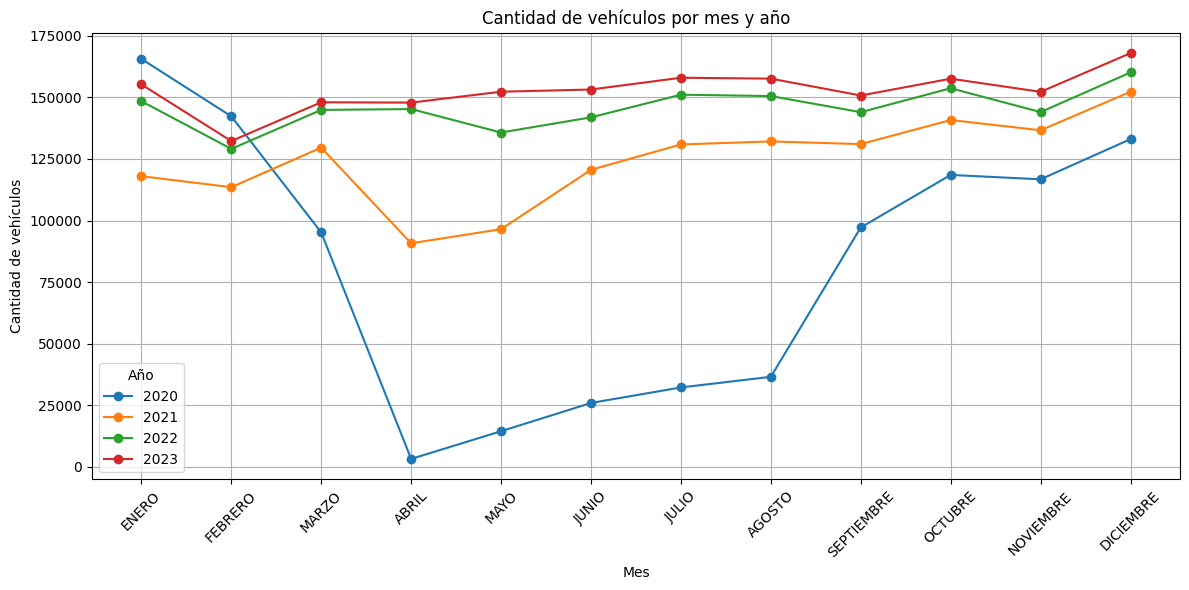

In [61]:
# Convertir la columna 'MES' a tipo categórico para ordenar los meses correctamente
meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
df['MES'] = pd.Categorical(df['MES'], categories=meses, ordered=True)

# Agrupar por año, mes y sumar los vehículos
resultado = df.groupby(['AÑO', 'MES'])['# VEHICULOS'].sum().unstack(level=0)

# Graficar
plt.figure(figsize=(12, 6))
for año in resultado.columns:
    plt.plot(resultado.index, resultado[año], marker='o', label=año)
plt.title('Cantidad de vehículos por mes y año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vehículos')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()



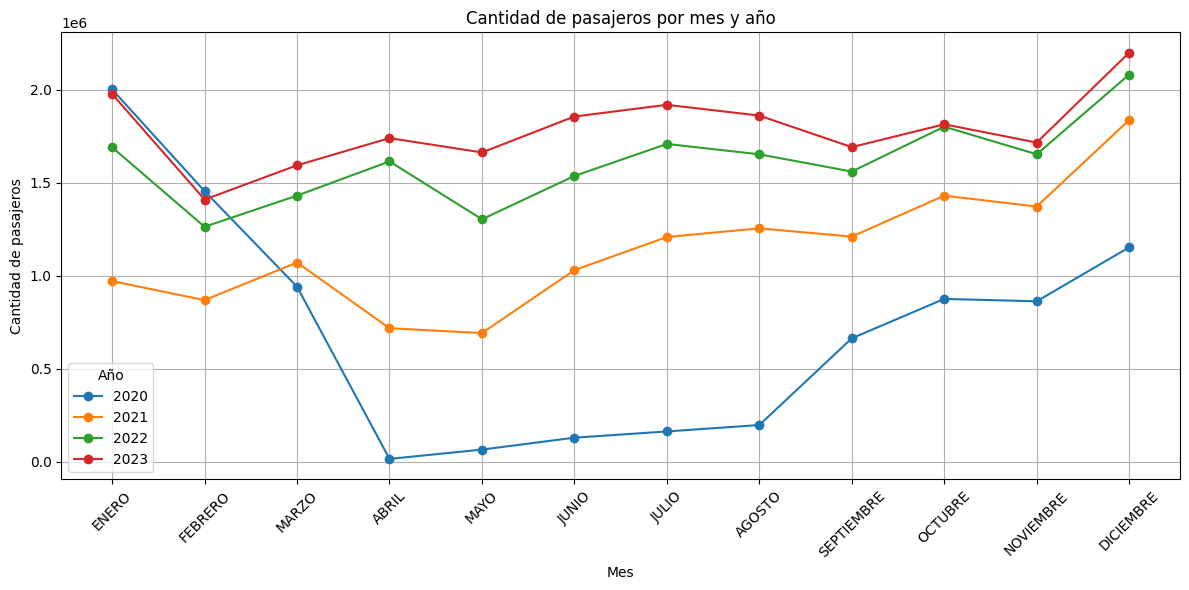

In [62]:
# Convertir la columna 'MES' a tipo categórico para ordenar los meses correctamente
meses = ['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE']
df['MES'] = pd.Categorical(df['MES'], categories=meses, ordered=True)

# Agrupar por año, mes y sumar los vehículos
resultado = df.groupby(['AÑO', 'MES'])['# PASAJEROS'].sum().unstack(level=0)

# Graficar
plt.figure(figsize=(12, 6))
for año in resultado.columns:
    plt.plot(resultado.index, resultado[año], marker='o', label=año)
plt.title('Cantidad de pasajeros por mes y año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pasajeros')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

In [63]:
#Se realiza una agrupación por MES, ESTADO, LUGAR, para conocer el número de vehiculos que llegaron y salieron de cada una de las terminales
df_agrupado = df.groupby(['MES','ESTADO','LUGAR',])['# VEHICULOS'].sum().reset_index()
print(df_agrupado)

           MES    ESTADO               LUGAR  # VEHICULOS
0        ENERO  LLEGADAS  TERMINAL DEL NORTE       206444
1        ENERO  LLEGADAS    TERMINAL DEL SUR        72714
2        ENERO   SALIDAS  TERMINAL DEL NORTE       226709
3        ENERO   SALIDAS    TERMINAL DEL SUR        81488
4      FEBRERO  LLEGADAS  TERMINAL DEL NORTE       178258
5      FEBRERO  LLEGADAS    TERMINAL DEL SUR        61866
6      FEBRERO   SALIDAS  TERMINAL DEL NORTE       205818
7      FEBRERO   SALIDAS    TERMINAL DEL SUR        71281
8        MARZO  LLEGADAS  TERMINAL DEL NORTE       179763
9        MARZO  LLEGADAS    TERMINAL DEL SUR        61644
10       MARZO   SALIDAS  TERMINAL DEL NORTE       205343
11       MARZO   SALIDAS    TERMINAL DEL SUR        70984
12       ABRIL  LLEGADAS  TERMINAL DEL NORTE       136826
13       ABRIL  LLEGADAS    TERMINAL DEL SUR        46134
14       ABRIL   SALIDAS  TERMINAL DEL NORTE       151343
15       ABRIL   SALIDAS    TERMINAL DEL SUR        52873
16        MAYO

In [64]:
#Creacion de una tabla pivote, para establecer el TOTAL de vehiculos que llegaron y salieron mes a mes
pivot_df = pd.pivot_table(df_agrupado, values='# VEHICULOS', index='MES', columns='ESTADO', aggfunc='sum').reset_index()
print(pivot_df)

ESTADO         MES  LLEGADAS  SALIDAS
0            ENERO    279158   308197
1          FEBRERO    240124   277099
2            MARZO    241407   276327
3            ABRIL    182960   204216
4             MAYO    186732   212298
5            JUNIO    207123   234526
6            JULIO    222155   250050
7           AGOSTO    222983   253868
8       SEPTIEMBRE    245065   277921
9          OCTUBRE    269124   301507
10       NOVIEMBRE    259672   290012
11       DICIEMBRE    288628   324798


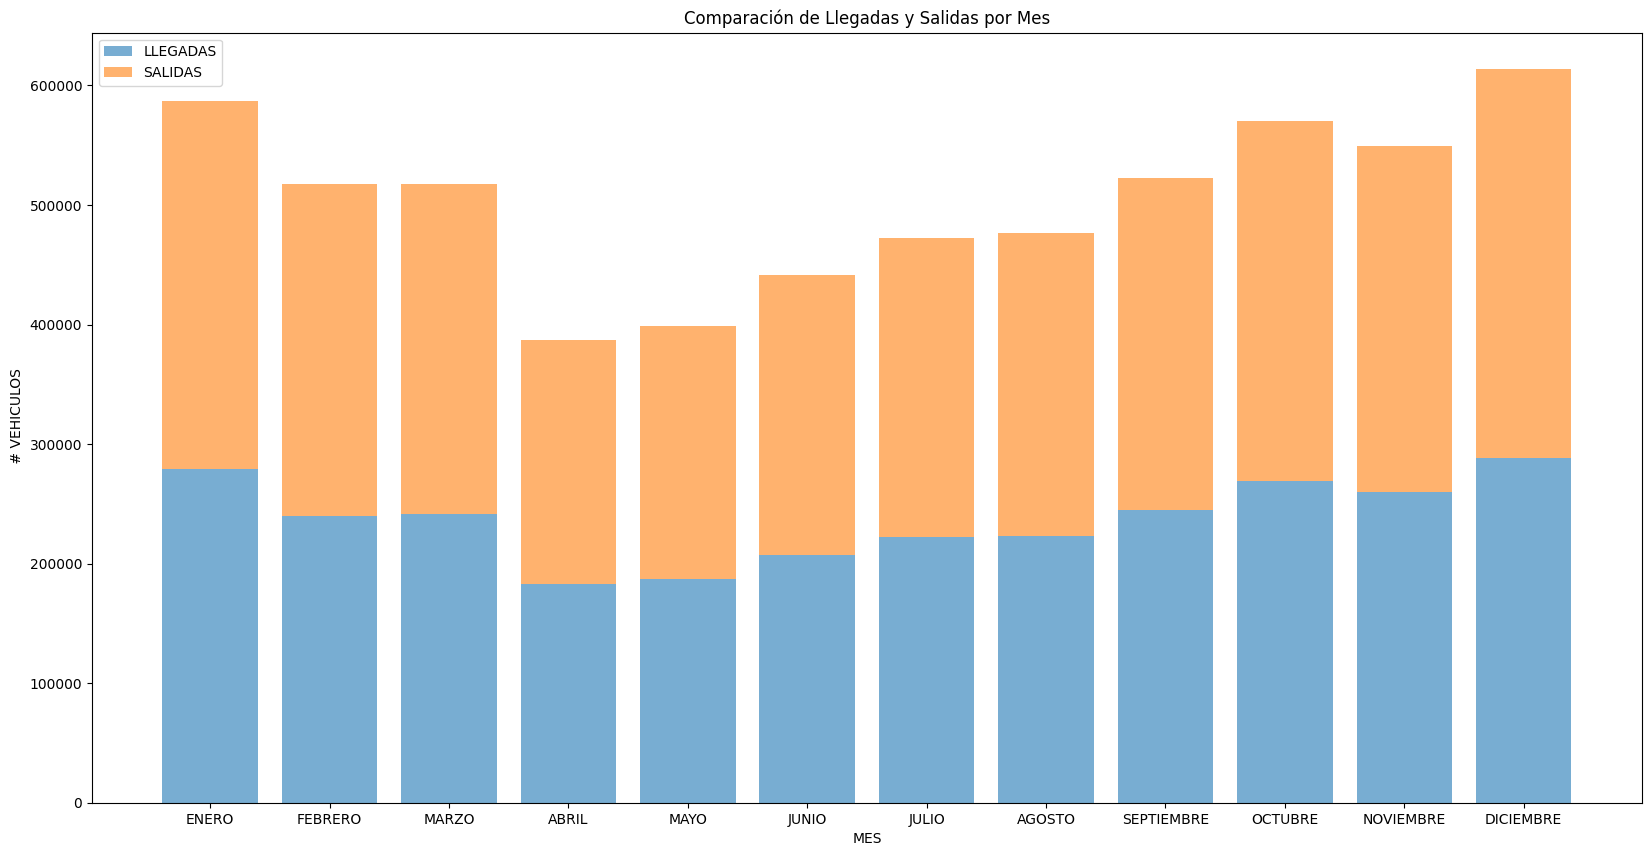

In [65]:
#Gráfico que compara las llegadas y salidas mes a mes de vehiculos

# Establecer el tamaño de la figura
plt.figure(figsize=(20, 10))

# Creación de las barras para las llegadas
plt.bar(pivot_df['MES'], pivot_df['LLEGADAS'], label='LLEGADAS', alpha=0.6)

# Creacion de las barras para las salidas, desplazadas ligeramente para no superponerse con las de llegadas
plt.bar(pivot_df['MES'], pivot_df['SALIDAS'], label='SALIDAS', alpha=0.6, bottom=pivot_df['LLEGADAS'])

# Añadir etiquetas y título
plt.xlabel('MES')
plt.ylabel(' # VEHICULOS')
plt.title('Comparación de Llegadas y Salidas por Mes')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [66]:
# se realiza un dataset de resumen, para conocer el mes que tuvo menos llegadas y salidas de vehiculos en los 4 años

# Sumar las llegadas y salidas para obtener el total de vehículos por mes
pivot_df['TOTAL VEHICULOS'] = pivot_df['LLEGADAS'] + pivot_df['SALIDAS']

# Encontrar el mes con menos llegadas y salidas
mes_menos_vehiculos = pivot_df[pivot_df['TOTAL VEHICULOS'] == pivot_df['TOTAL VEHICULOS'].min()]

# Encontrar el mes con más llegadas y salidas
mes_mas_vehiculos = pivot_df[pivot_df['TOTAL VEHICULOS'] == pivot_df['TOTAL VEHICULOS'].max()]

# Concatenar los DataFrames para obtener solo los meses de interés
df_resumen = pd.concat([mes_menos_vehiculos, mes_mas_vehiculos])

print(df_resumen)

ESTADO        MES  LLEGADAS  SALIDAS  TOTAL VEHICULOS
3           ABRIL    182960   204216           387176
11      DICIEMBRE    288628   324798           613426


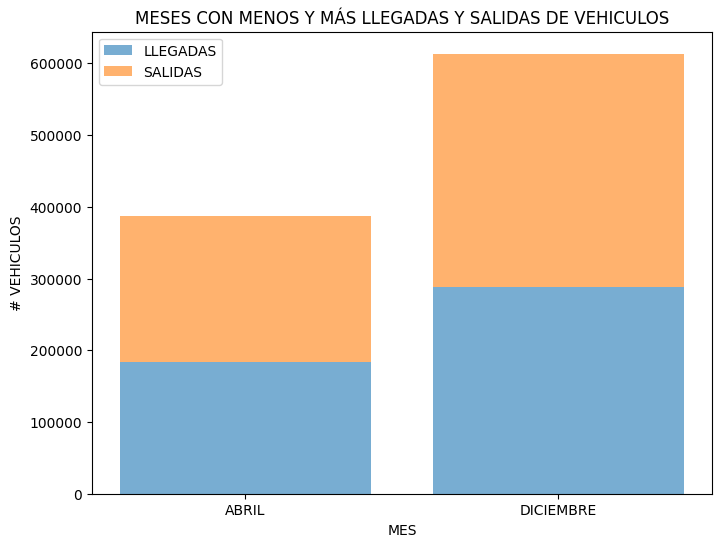

In [67]:
# Gráfica para evidenciar lo descrito en el dataset de resumen que se generó anteriormente

# Establecer el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear barras para las llegadas y salidas de los meses de interés
plt.bar(df_resumen['MES'], df_resumen['LLEGADAS'], label='LLEGADAS', alpha=0.6)
plt.bar(df_resumen['MES'], df_resumen['SALIDAS'], bottom=df_resumen['LLEGADAS'], label='SALIDAS', alpha=0.6)

# Añadir etiquetas y título
plt.xlabel('MES')
plt.ylabel('# VEHICULOS')
plt.title('MESES CON MENOS Y MÁS LLEGADAS Y SALIDAS DE VEHICULOS')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [68]:
#Se realiza una agrupación por MES, ESTADO, LUGAR, para conocer el número de pasajeros que llegaron y salieron de cada una de las terminales
df_agrupado = df.groupby(['MES','ESTADO','LUGAR',])['# PASAJEROS'].sum().reset_index()
print(df_agrupado)

           MES    ESTADO               LUGAR  # PASAJEROS
0        ENERO  LLEGADAS  TERMINAL DEL NORTE      2352431
1        ENERO  LLEGADAS    TERMINAL DEL SUR       598732
2        ENERO   SALIDAS  TERMINAL DEL NORTE      2956700
3        ENERO   SALIDAS    TERMINAL DEL SUR       733618
4      FEBRERO  LLEGADAS  TERMINAL DEL NORTE      1661644
5      FEBRERO  LLEGADAS    TERMINAL DEL SUR       398915
6      FEBRERO   SALIDAS  TERMINAL DEL NORTE      2432687
7      FEBRERO   SALIDAS    TERMINAL DEL SUR       504211
8        MARZO  LLEGADAS  TERMINAL DEL NORTE      1656954
9        MARZO  LLEGADAS    TERMINAL DEL SUR       389086
10       MARZO   SALIDAS  TERMINAL DEL NORTE      2469350
11       MARZO   SALIDAS    TERMINAL DEL SUR       522203
12       ABRIL  LLEGADAS  TERMINAL DEL NORTE      1388085
13       ABRIL  LLEGADAS    TERMINAL DEL SUR       316293
14       ABRIL   SALIDAS  TERMINAL DEL NORTE      1940244
15       ABRIL   SALIDAS    TERMINAL DEL SUR       444043
16        MAYO

In [69]:
#Creacion de tabla para la visualizacion de la cantidad de llegadas y salidas de pasajeros
pivot_df = pd.pivot_table(df_agrupado, values='# PASAJEROS', index='MES', columns='ESTADO', aggfunc='sum').reset_index()
print(pivot_df)

ESTADO         MES  LLEGADAS  SALIDAS
0            ENERO   2951163  3690318
1          FEBRERO   2060559  2936898
2            MARZO   2046040  2991553
3            ABRIL   1704378  2384287
4             MAYO   1542472  2182116
5            JUNIO   1866839  2686129
6            JULIO   2098559  2901091
7           AGOSTO   2073639  2893434
8       SEPTIEMBRE   2114068  3012586
9          OCTUBRE   2443397  3479329
10       NOVIEMBRE   2318749  3286060
11       DICIEMBRE   2844136  4427958


In [70]:
#se realiza un dataset de resumen, para conocer el mes que tuvo menos llegadas y salidas de pasajeros en los 4 años

# Sumar las llegadas y salidas para obtener el total de vehículos por mes
pivot_df['TOTAL PASAJEROS'] = pivot_df['LLEGADAS'] + pivot_df['SALIDAS']

# Encontrar el mes con menos llegadas y salidas
mes_menos_pasajeros = pivot_df[pivot_df['TOTAL PASAJEROS'] == pivot_df['TOTAL PASAJEROS'].min()]

# Encontrar el mes con más llegadas y salidas
mes_mas_pasajeros = pivot_df[pivot_df['TOTAL PASAJEROS'] == pivot_df['TOTAL PASAJEROS'].max()]

# Concatenar los DataFrames para obtener solo los meses de interés
df_resumen = pd.concat([mes_menos_pasajeros, mes_mas_pasajeros])

print(df_resumen)

ESTADO        MES  LLEGADAS  SALIDAS  TOTAL PASAJEROS
4            MAYO   1542472  2182116          3724588
11      DICIEMBRE   2844136  4427958          7272094


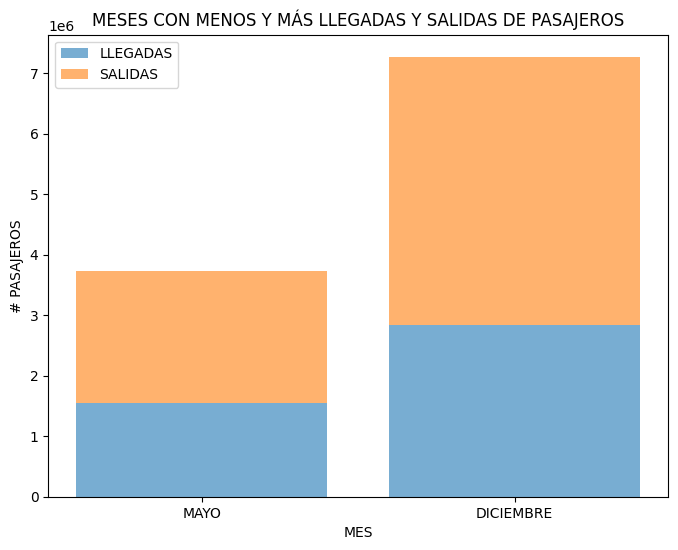

In [71]:
# Gráfica para evidenciar lo descrito en el dataset de resumen que se generó anteriormente

# Establecer el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear barras para las llegadas y salidas de los meses de interés
plt.bar(df_resumen['MES'], df_resumen['LLEGADAS'], label='LLEGADAS', alpha=0.6)
plt.bar(df_resumen['MES'], df_resumen['SALIDAS'], bottom=df_resumen['LLEGADAS'], label='SALIDAS', alpha=0.6)

# Añadir etiquetas y título
plt.xlabel('MES')
plt.ylabel('# PASAJEROS')
plt.title('MESES CON MENOS Y MÁS LLEGADAS Y SALIDAS DE PASAJEROS')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [72]:
pip install folium

In [73]:
# Agrupar por MES, ESTADO y LUGAR, y sumar el número de vehículos
df_agrupado = df.groupby(['MES', 'ESTADO', 'LUGAR'])['# VEHICULOS'].sum().reset_index()

# Crear una tabla pivote para tener salidas y llegadas en columnas separadas
pivot_df = pd.pivot_table(df_agrupado, values='# VEHICULOS', index=['MES', 'LUGAR'], columns='ESTADO', aggfunc='sum').reset_index()

print(pivot_df)

ESTADO         MES               LUGAR  LLEGADAS  SALIDAS
0            ENERO  TERMINAL DEL NORTE    206444   226709
1            ENERO    TERMINAL DEL SUR     72714    81488
2          FEBRERO  TERMINAL DEL NORTE    178258   205818
3          FEBRERO    TERMINAL DEL SUR     61866    71281
4            MARZO  TERMINAL DEL NORTE    179763   205343
5            MARZO    TERMINAL DEL SUR     61644    70984
6            ABRIL  TERMINAL DEL NORTE    136826   151343
7            ABRIL    TERMINAL DEL SUR     46134    52873
8             MAYO  TERMINAL DEL NORTE    141688   158869
9             MAYO    TERMINAL DEL SUR     45044    53429
10           JUNIO  TERMINAL DEL NORTE    156584   175740
11           JUNIO    TERMINAL DEL SUR     50539    58786
12           JULIO  TERMINAL DEL NORTE    167697   187221
13           JULIO    TERMINAL DEL SUR     54458    62829
14          AGOSTO  TERMINAL DEL NORTE    167573   189485
15          AGOSTO    TERMINAL DEL SUR     55410    64383
16      SEPTIE

###Creacion Mapa
1. **Se realiza un mapa para ubicar de manera georeferenciada las terminales norte y sur de la ciudad de medellin, con el objetivo de conocer, si la ubicacion de dichas terminales puede influir o no, en el flujo y/o tráfico de vehiculos y pasajeros en cada una de las terminales**

In [74]:
import folium

# Coordenadas de las terminales (latitud, longitud)
Terminal_Sur = (6.216170469970633, -75.58872457301509)
Terminal_Norte = (6.281083736378596, -75.56980965880318)

# Crear un mapa centrado en la ubicación promedio de las terminales
mapa = folium.Map(location=[(6.216170469970633 + 6.281083736378596) / 2, (-75.58872457301509 + -75.56980965880318) / 2], zoom_start=12)

# Agregar marcadores para las terminales
folium.Marker(Terminal_Sur, popup='Terminal Sur').add_to(mapa)
folium.Marker(Terminal_Norte, popup='Terminal Norte').add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save('mapa_terminales.html')

# Mostrar el mapa en un navegador
mapa

#MEDELLÍN TENDRÁ OTRA TERMINAL DE TRANSPORTE

La futura Terminal del Sur estará situada en los terrenos del Aeroparque Olaya Herrera, distante cuatro kilómetros en línea recta del parque de Berrío, en el centro de la ciudad.
Para la Terminal del Sur se iría aproximadamente el 30 por ciento de los usuarios de la actual Terminal del Norte, donde se despachan diariamente cerca de 1.134 buses, para un total de treinta mil pasajeros movilizados, que cada año suman treinta millones de personas.
La del Sur servirá las rutas del suroccidente del país: Cali, Buenaventura, Popayán; el sur-centro: Manizales, Armenia, Ibagué, Pereira, Huila, y una parte del tráfico de Bogotá que ingresará por la nueva vía del Alto de Las Palmas-Aeropuerto-Autopista.
Igualmente, en el departamento de Antioquia atenderá el suroriente, el suroeste y parcialmente el oriente.

#LLegadas por mes y año
se filtran las llegadas y salidas de ambas terminales por mes y año, para conocer el flujo de vehiculos y pasajeros mes a mes en el periodo comprendido entre 2020 a 2023

In [75]:
# Filtrar las llegadas y sumar por mes y año
llegadas = df.query("ESTADO == 'LLEGADAS'")
llegadas_sumadas = llegadas.groupby(['AÑO', 'MES'])['# VEHICULOS', '# PASAJEROS'].sum().reset_index()

# Filtrar las salidas y sumar por mes y año
salidas = df.query("ESTADO == 'SALIDAS'")
salidas_sumadas = salidas.groupby(['AÑO', 'MES'])['# VEHICULOS', '# PASAJEROS'].sum().reset_index()

# Visualizar los resultados
print("Llegadas sumadas por mes y año:")
print(llegadas_sumadas)

#print("\nSalidas sumadas por mes y año:")
#print(salidas_sumadas)

Llegadas sumadas por mes y año:
     AÑO         MES  # VEHICULOS  # PASAJEROS
0   2020       ENERO        76422       847333
1   2020     FEBRERO        63835       581662
2   2020       MARZO        42723       369354
3   2020       ABRIL         1262         4043
4   2020        MAYO         5055        17475
5   2020       JUNIO         9603        38941
6   2020       JULIO        12452        55118
7   2020      AGOSTO        14197        70172
8   2020  SEPTIEMBRE        42799       257370
9   2020     OCTUBRE        52912       347605
10  2020   NOVIEMBRE        52872       352727
11  2020   DICIEMBRE        60111       432542
12  2021       ENERO        54488       435867
13  2021     FEBRERO        51383       349999
14  2021       MARZO        58775       423799
15  2021       ABRIL        41659       305639
16  2021        MAYO        44140       278625
17  2021       JUNIO        55974       417903
18  2021       JULIO        60770       490974
19  2021      AGOSTO        

<ipython-input-75-b740b06935e9>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  llegadas_sumadas = llegadas.groupby(['AÑO', 'MES'])['# VEHICULOS', '# PASAJEROS'].sum().reset_index()
<ipython-input-75-b740b06935e9>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salidas_sumadas = salidas.groupby(['AÑO', 'MES'])['# VEHICULOS', '# PASAJEROS'].sum().reset_index()


#Filtrar las llegadas y salidas por terminal

Se filtran las llegadas y salidas por terminal norte y sur, para obtener el total de vehiculos que llegaron y salieron de cada una de las terminales con el objetivo de conocer cuál terminal tuvo un flujo de vehiculos mayor

In [76]:
# Filtrar las llegadas y salidas por terminal
llegadas_norte = df.query("ESTADO == 'LLEGADAS' and LUGAR == 'TERMINAL DEL NORTE'")
salidas_norte = df.query("ESTADO == 'SALIDAS' and LUGAR == 'TERMINAL DEL NORTE'")
llegadas_sur = df.query("ESTADO == 'LLEGADAS' and LUGAR == 'TERMINAL DEL SUR'")
salidas_sur = df.query("ESTADO == 'SALIDAS' and LUGAR == 'TERMINAL DEL SUR'")

# Sumar los  pasajeros para cada combinación
llegadas_norte_sumadas = llegadas_norte.groupby(['AÑO', 'MES'])['# PASAJEROS'].sum().reset_index()
salidas_norte_sumadas = salidas_norte.groupby(['AÑO', 'MES'])['# PASAJEROS'].sum().reset_index()
llegadas_sur_sumadas = llegadas_sur.groupby(['AÑO', 'MES'])['# PASAJEROS'].sum().reset_index()
salidas_sur_sumadas = salidas_sur.groupby(['AÑO', 'MES'])['# PASAJEROS'].sum().reset_index()
# Sumar los  vehiculos para cada combinación
llegadas_norte_sumadas = llegadas_norte.groupby(['AÑO', 'MES'])['# VEHICULOS'].sum().reset_index()
salidas_norte_sumadas = salidas_norte.groupby(['AÑO', 'MES'])['# VEHICULOS'].sum().reset_index()
llegadas_sur_sumadas = llegadas_sur.groupby(['AÑO', 'MES'])['# VEHICULOS'].sum().reset_index()
salidas_sur_sumadas = salidas_sur.groupby(['AÑO', 'MES'])['# VEHICULOS'].sum().reset_index()

# Calcular los totales de vehiculos por terminal
total_llegadas_norte = llegadas_norte_sumadas['# VEHICULOS'].sum()
total_salidas_norte = salidas_norte_sumadas['# VEHICULOS'].sum()
total_llegadas_sur = llegadas_sur_sumadas['# VEHICULOS'].sum()
total_salidas_sur = salidas_sur_sumadas['# VEHICULOS'].sum()


print(total_llegadas_norte)
print(total_salidas_norte)
print(total_llegadas_sur)
print(total_salidas_sur)

2127223
2384941
717908
825878


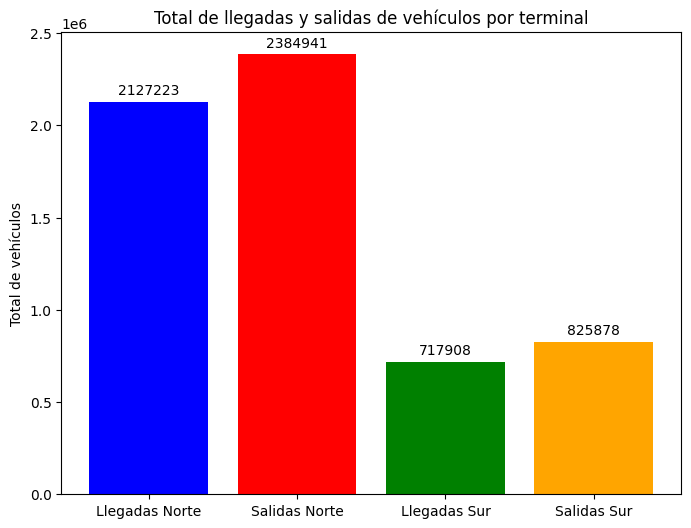

In [77]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
barras = ax.bar(['Llegadas Norte', 'Salidas Norte', 'Llegadas Sur', 'Salidas Sur'],
                [total_llegadas_norte, total_salidas_norte, total_llegadas_sur, total_salidas_sur],
                color=['blue', 'red', 'green', 'orange'])

# Agregar etiquetas y título
ax.set_ylabel('Total de vehículos')
ax.set_title('Total de llegadas y salidas de vehículos por terminal')

# Mostrar los valores en las barras
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()

#Matriz de Correlación y Mapa de Calor

<ipython-input-78-75b045fa416a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df.corr()


                  AÑO  # VEHICULOS  # PASAJEROS
AÑO          1.000000     0.343233     0.377610
# VEHICULOS  0.343233     1.000000     0.958195
# PASAJEROS  0.377610     0.958195     1.000000


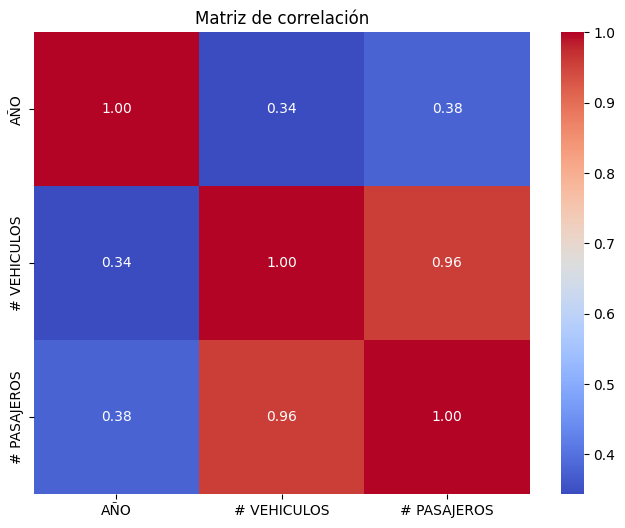

In [78]:
# Calcular la matriz de correlación
correlacion = df.corr()

# Mostrar la matriz de correlación
print(correlacion)

# Visualizar la matriz de correlación con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

#Creación de los modelos de entrenamiento
###Regresión Lineal

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convertir el mes a valores numéricos
meses = {'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4, 'MAYO': 5, 'JUNIO': 6,
         'JULIO': 7, 'AGOSTO': 8, 'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12}
df['MES_NUM'] = df['MES'].map(meses)

# Definir las variables independientes y dependientes
X = df[['AÑO', 'MES_NUM', '# PASAJEROS']]
y = df['# VEHICULOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')
print(f'Coeficiente de determinación (R²): {r2}')

# Predecir la cantidad de vehículos para el año 2024
año_2024 = pd.DataFrame({'AÑO': [2024]*12, 'MES_NUM': list(range(1, 13)), '# PASAJEROS': [50000]*12})  # Ejemplo de número de pasajeros
predicción_2024 = modelo.predict(año_2024)
print('Predicciones para el año 2024:')
for mes, pred in zip(meses.keys(), predicción_2024):
    print(f'{mes}: {pred}')


Error cuadrático medio: 21973723.446672264
Coeficiente de determinación (R²): 0.9279296394831177
Predicciones para el año 2024:
ENERO: 11925.149900979945
FEBRERO: 11946.629181072349
MARZO: 11968.108461164753
ABRIL: 11989.587741257157
MAYO: 12011.067021349678
JUNIO: 12032.546301442082
JULIO: 12054.025581534486
AGOSTO: 12075.50486162689
SEPTIEMBRE: 12096.984141719295
OCTUBRE: 12118.463421811699
NOVIEMBRE: 12139.942701904103
DICIEMBRE: 12161.421981996507


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convertir el mes a valores numéricos
meses = {'ENERO': 1, 'FEBRERO': 2, 'MARZO': 3, 'ABRIL': 4, 'MAYO': 5, 'JUNIO': 6,
         'JULIO': 7, 'AGOSTO': 8, 'SEPTIEMBRE': 9, 'OCTUBRE': 10, 'NOVIEMBRE': 11, 'DICIEMBRE': 12}
df['MES_NUM'] = df['MES'].map(meses)

# Definir las variables independientes y dependientes
X = df[['AÑO', 'MES_NUM']]
y = df['# VEHICULOS']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {mse}')
print(f'Coeficiente de determinación (R²): {r2}')

# Predecir la cantidad de vehículos para el año 2024
año_2024 = pd.DataFrame({'AÑO': [2024]*12, 'MES_NUM': list(range(1, 13))})
predicción_2024 = modelo.predict(año_2024)
print('Predicciones para el año 2024:')
for mes, pred in zip(meses.keys(), predicción_2024):
    print(f'{mes}: {pred}')


Error cuadrático medio: 313655193.9199245
Coeficiente de determinación (R²): -0.02873975631221337
Predicciones para el año 2024:
ENERO: 43309.76602001488
FEBRERO: 43962.1990087498
MARZO: 44614.63199748285
ABRIL: 45267.06498621777
MAYO: 45919.49797495268
JUNIO: 46571.930963685736
JULIO: 47224.36395242065
AGOSTO: 47876.79694115557
SEPTIEMBRE: 48529.22992988862
OCTUBRE: 49181.66291862354
NOVIEMBRE: 49834.09590735845
DICIEMBRE: 50486.528896091506
